<a href="https://colab.research.google.com/github/luismill/08MBID---Trabajo/blob/main/08MBID_TrabajoPr%C3%A1ctico.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 08MBID - Trabajo práctico



Este cuaderno se utiliza para la preparación de los datos que se utilizarán para las distintas visualizaciones. Al final se encuentra el gráfico boxplot realizado con Python y seaborn.

In [1]:
# carga de datos
import pandas as pd
from google.colab import files
# manipulación y visualización
import matplotlib.pyplot as plt
import numpy as np
import io
import seaborn as sns

In [2]:
# Función para cargar archivos al cuaderno
def upload_files ():
  uploaded = files.upload()
  for fn in uploaded.keys():
    print('User uploaded file "{name}" with length {length} bytes'.format(
        name=fn, length=len(uploaded[fn])))
    df = pd.read_csv(io.StringIO(uploaded[fn].decode('utf-8')))
    return df

Cargo el dataset

In [3]:
df = upload_files()
df.head()

Saving DatasetPeliculasBeneficio.csv to DatasetPeliculasBeneficio.csv
User uploaded file "DatasetPeliculasBeneficio.csv" with length 5640368 bytes


,Unnamed: 0,genres_x,id,original_language,popularity,budget,revenue,vote_average,credits,keywords,Year,duration,main_production_company,Director_age,Votes,Rating,month,Director_debut,Writer_debut,Profit
0,0,Drama,The Shawshank Redemption-1994,en,63.870,25000000.0,2.834147e+07,8.7,Tim Robbins-Morgan Freeman-Bob Gunton-William ...,prison-corruption-police brutality-prison cell...,1994.0,142.0,Other,35.0,2617710.0,9.295059,9,False,True,True
1,1,"Action,Crime,Drama",The Dark Knight-2008,en,73.078,185000000.0,1.004558e+09,8.5,Christian Bale-Heath Ledger-Michael Caine-Gary...,crime fighter-secret identity-anti hero-scarec...,2008.0,152.0,Other,38.0,2594861.0,8.994669,7,False,True,True
2,2,"Action,Adventure,Sci-Fi",Inception-2010,en,97.570,160000000.0,8.255328e+08,8.4,Leonardo DiCaprio-Joseph Gordon-Levitt-Ken Wat...,paris france-spy-philosophy-allegory-dream-kid...,2010.0,148.0,Other,40.0,2309642.0,8.794521,7,False,True,True
3,3,Drama,Fight Club-1999,en,58.846,63000000.0,1.008538e+08,8.4,Edward Norton-Brad Pitt-Helena Bonham Carter-M...,based on novel or book-support group-dual iden...,1999.0,139.0,Other,37.0,2068414.0,8.795334,10,False,True,True
4,4,"Drama,Romance",Forrest Gump-1994,en,58.279,55000000.0,6.773877e+08,8.5,Tom Hanks-Robin Wright-Gary Sinise-Mykelti Wil...,vietnam veteran-hippie-washington dc usa-menta...,1994.0,142.0,Paramount,43.0,2027637.0,8.796631,6,False,True,True


In [4]:
df.shape

(8031, 20)

In [5]:
df.describe()

,Unnamed: 0,popularity,budget,revenue,vote_average,Year,duration,Director_age,Votes,Rating,month
count,8031.000000,8031.000000,8.031000e+03,8.031000e+03,8031.000000,8031.000000,8031.000000,8031.000000,8.031000e+03,8031.000000,8031.00000
mean,15994.033993,26.319166,2.638371e+07,7.569503e+07,6.306550,2000.230855,107.797348,45.463579,9.172825e+04,6.417392,6.95866
std,34129.087810,120.859229,3.896034e+07,1.631839e+08,1.326944,18.597440,24.016658,9.283974,1.747365e+05,1.088274,3.40043
min,0.000000,0.600000,1.000000e+00,1.000000e+00,0.000000,1914.000000,0.000000,16.000000,5.000000e+00,1.005100,1.00000
25%,2108.500000,7.190000,3.000000e+06,3.000000e+06,5.900000,1994.000000,94.000000,41.000000,6.846000e+03,5.800000,4.00000
50%,5033.000000,11.425000,1.200000e+07,1.812324e+07,6.400000,2006.000000,105.000000,43.000000,3.059000e+04,6.498614,7.00000
75%,12249.000000,20.890000,3.100000e+07,7.339746e+07,7.000000,2013.000000,120.000000,50.000000,1.000640e+05,7.196865,10.00000
max,233675.000000,5038.876000,3.800000e+08,2.847246e+09,10.000000,2022.000000,199.500000,89.000000,2.617710e+06,10.000000,12.00000


Quito una columna que sobra y reseteo el índice

In [6]:
df.drop('Unnamed: 0', axis=1, inplace=True)
df.reset_index(inplace=True, drop=True)

Me quedo solo con las películas con duración de más de una hora, para borrar los cortos

In [7]:
pelis = df.drop(df[df.duration < 60].index)

## Datos para gráfica de Valoración media de las películas por genero

Obtengo el género principal

In [8]:
pelis['genero_princ'] = pelis.genres_x.str.split(',').str[0]
pelis.drop('genres_x', axis=1, inplace=True)

In [9]:
pelis.groupby(['genero_princ']).count().id.sort_values()

genero_princ
Short             1
War               1
Game-Show         1
Reality-TV        2
History           3
Sport             3
Talk-Show         4
Music             4
Film-Noir         5
Musical           6
Family            7
Sci-Fi           11
Western          12
Romance          14
Thriller         25
Mystery          29
Fantasy          39
Animation        55
Documentary      70
Horror          359
Biography       415
Crime           527
Adventure       752
Drama          1418
Comedy         1991
Action         2111
Name: id, dtype: int64

Borro las películas de géneros con menos de 10 películas

In [10]:
df_genero = pelis.groupby('genero_princ').filter(lambda x : len(x)>10)

Obtengo la nota media por género

In [11]:
Rating_genero = df_genero.groupby('genero_princ').mean()['Rating']
Rating_genero.head()

genero_princ
Action       6.242978
Adventure    6.449812
Animation    6.696189
Biography    7.040415
Comedy       6.203532
Name: Rating, dtype: float64

In [12]:
#Rating_genero.to_excel('Pelis_por_genero.xlsx')
#files.download('Pelis_por_genero.xlsx')

## Datos para gráfica de Valoración media de las películas por año

Obtengo la nota media de cada año

In [13]:
Rating_año = pelis.groupby('Year').mean()['Rating']
Rating_año.head()


Year
1914.0    6.400000
1915.0    6.349204
1916.0    6.642716
1918.0    6.106854
1919.0    6.784615
Name: Rating, dtype: float64

Obtengo el número de películas por año y miro los años con menos de 10 películas

In [14]:
Peliculas_por_año = pelis.groupby('Year').count()['id'].sort_values()
Años_filtrados = Peliculas_por_año[Peliculas_por_año < 10]
Años_filtrados

Year
1914.0    1
1918.0    1
1919.0    1
1923.0    1
1915.0    2
1916.0    2
1920.0    2
1921.0    2
1922.0    2
1924.0    4
1930.0    4
1925.0    5
1929.0    6
1932.0    6
1927.0    7
1926.0    7
1938.0    8
1931.0    9
1950.0    9
1937.0    9
Name: id, dtype: int64

Elimino los años con menos de 10 películas

In [15]:
Rating_año_filtrado = Rating_año.drop(Años_filtrados.index)

In [16]:
Pelis_año = Peliculas_por_año[Peliculas_por_año >= 10]

In [17]:
evolucion = pd.concat([Rating_año_filtrado, Pelis_año], axis=1)
evolucion.rename({'id': 'Películas'}, inplace=True, axis=1)

Obtengo la mejor película de cada año y su nota

In [18]:
Mejor_película_por_año = pelis.groupby('Year')[['Rating', 'id']].max()
Mejor_película_por_año.rename({'Rating': 'Nota máxima', 'id':'Mejor película'}, inplace=True, axis=1)
Mejor_película_por_año

,Nota máxima,Mejor película
Year,,
1914.0,6.400000,Neptune's Daughter-1914
1915.0,6.500000,The Birth of a Nation-1915
1916.0,7.181250,A Daughter of the Gods-1916
1918.0,6.106854,Mickey-1918
1919.0,6.784615,The Miracle Man-1919
...,...,...
2018.0,8.597538,Çift'lik Bank: Tosun Firarda-2018
2019.0,8.500000,Zombieland: Double Tap-2019
2020.0,8.295298,Zola-2020


Uno los datos para guardarlos en un excel

In [19]:
df2 = df.join(Mejor_película_por_año)
df2.head()

,genres_x,id,original_language,popularity,budget,revenue,vote_average,credits,keywords,Year,...,main_production_company,Director_age,Votes,Rating,month,Director_debut,Writer_debut,Profit,Nota máxima,Mejor película
0,Drama,The Shawshank Redemption-1994,en,63.870,25000000.0,2.834147e+07,8.7,Tim Robbins-Morgan Freeman-Bob Gunton-William ...,prison-corruption-police brutality-prison cell...,1994.0,...,Other,35.0,2617710.0,9.295059,9,False,True,True,NaN,NaN
1,"Action,Crime,Drama",The Dark Knight-2008,en,73.078,185000000.0,1.004558e+09,8.5,Christian Bale-Heath Ledger-Michael Caine-Gary...,crime fighter-secret identity-anti hero-scarec...,2008.0,...,Other,38.0,2594861.0,8.994669,7,False,True,True,NaN,NaN
2,"Action,Adventure,Sci-Fi",Inception-2010,en,97.570,160000000.0,8.255328e+08,8.4,Leonardo DiCaprio-Joseph Gordon-Levitt-Ken Wat...,paris france-spy-philosophy-allegory-dream-kid...,2010.0,...,Other,40.0,2309642.0,8.794521,7,False,True,True,NaN,NaN
3,Drama,Fight Club-1999,en,58.846,63000000.0,1.008538e+08,8.4,Edward Norton-Brad Pitt-Helena Bonham Carter-M...,based on novel or book-support group-dual iden...,1999.0,...,Other,37.0,2068414.0,8.795334,10,False,True,True,NaN,NaN
4,"Drama,Romance",Forrest Gump-1994,en,58.279,55000000.0,6.773877e+08,8.5,Tom Hanks-Robin Wright-Gary Sinise-Mykelti Wil...,vietnam veteran-hippie-washington dc usa-menta...,1994.0,...,Paramount,43.0,2027637.0,8.796631,6,False,True,True,NaN,NaN


In [20]:
#df2.to_excel('Pelis_por_año.xlsx')
#files.download('Pelis_por_año.xlsx')

## Boxplot de las principales productoras

In [21]:
pelis.main_production_company.unique()

array(['Other', 'Paramount', 'New Line Cinema', 'Universal Pictures',
       'Warner Bros. Pictures', 'Gaumont', 'Walt Disney Pictures',
       '20th Century Fox', 'United Artists', 'Shaw Brothers',
       'Columbia Pictures', 'Metro', 'Toho', 'Walt Disney Productions',
       'UFA', 'Daiei Film', 'RKO Radio Pictures', 'Nordisk Film', 'BBC',
       'ARTE', 'Mosfilm', 'Republic Pictures', 'Shochiku',
       'Hal Roach Studios', 'ARD', 'Fox Film Corporation', 'SF Studios',
       'Universal International Pictures', 'The Asylum', 'Toei Company',
       'First National Pictures', 'The Vitaphone Corporation',
       'ONF | NFB'], dtype=object)

In [22]:
top_productoras = pelis.groupby('main_production_company').count()['id'].sort_values(ascending=False).head(6).drop('Other')

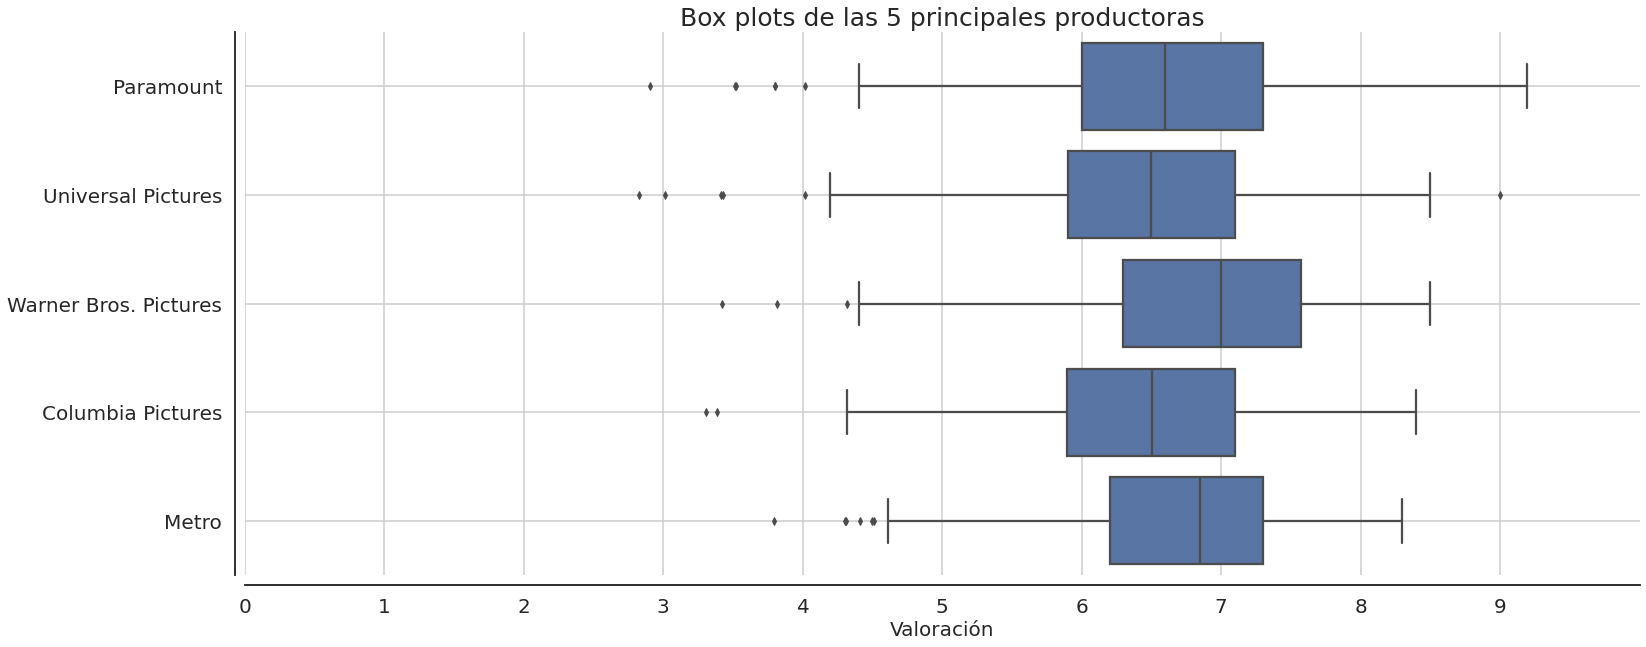

In [45]:
labels = []
for c in top_productoras.index:
   label = c.replace('Pictures', 'Pic.')
   labels.append(label)

df_productoras = pelis[pelis.main_production_company.isin(top_productoras.index)]

sns.set_theme(style="white", context="talk")
f, ax = plt.subplots(figsize=(25, 10))
p = sns.boxplot(x="Rating", y="main_production_company",
                color='b',
                orient='h',
                data=df_productoras,
                ax= ax)

sns.despine(offset=10)
p.tick_params(labelsize=20)
p.set_xlabel("Valoración",fontsize=20)
p.set_ylabel(None)
p.axes.set_title("Box plots de las 5 principales productoras",fontsize=25)
p.set(xlim=(0, 10))
p.set_xticks(range(10))
plt.grid()
plt.show()